In [1]:
from PIL import Image
import numpy as np
from astropy.io import fits
import glob
from PIL import Image as PILImage
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower'  # we want to show images, not matrices, so we set the origin to the lower-left
pl.matplotlib.style.use('dark_background')  # Optional configuration: if run, this will look nice on dark background notebooks

from astropy import units as u
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from IPython.display import Image
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist
import glob
import os
from astropy.io import fits

from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.fitting import LinearLSQFitter

from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter

In [2]:
h1s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Data_dropbox_Sep14\\H_1s_clear00* AST4723C class.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Data_dropbox_Sep14\\dark_1e-1s00* AST4723C class.FIT")],
                        axis=0)
             )

h5s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Data_dropbox_Sep14\\H_5s_clear00* AST4723C class.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Data_dropbox_Sep14\\dark_1e-1s00* AST4723C class.FIT")],
                        axis=0)
             )


Text(0.5, 1.0, 'Hydrogen 1s Spectra')

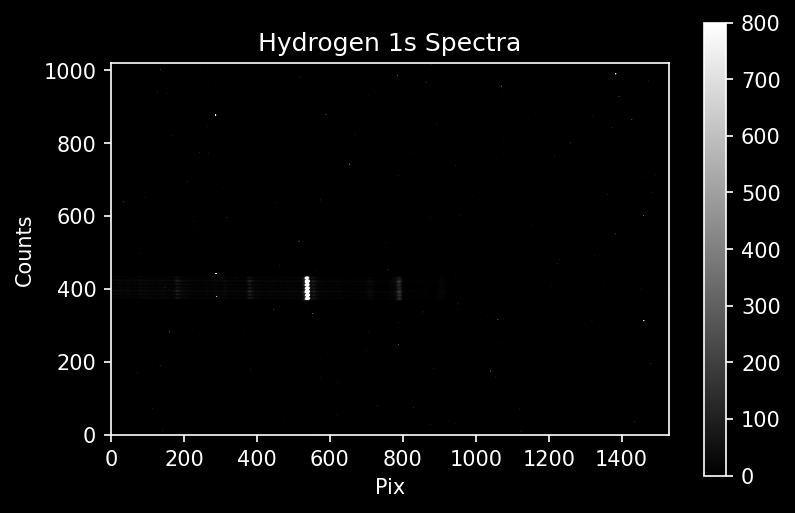

In [3]:
%matplotlib inline
import pylab as pl
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 150
pl.matplotlib.style.use('dark_background') # Optional!
pl.imshow(h1s_image_data, cmap='gray', vmax=0, vmin=800)
pl.colorbar()
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Hydrogen 1s Spectra')


Text(0.5, 1.0, 'Hydrogen 5s Spectra')

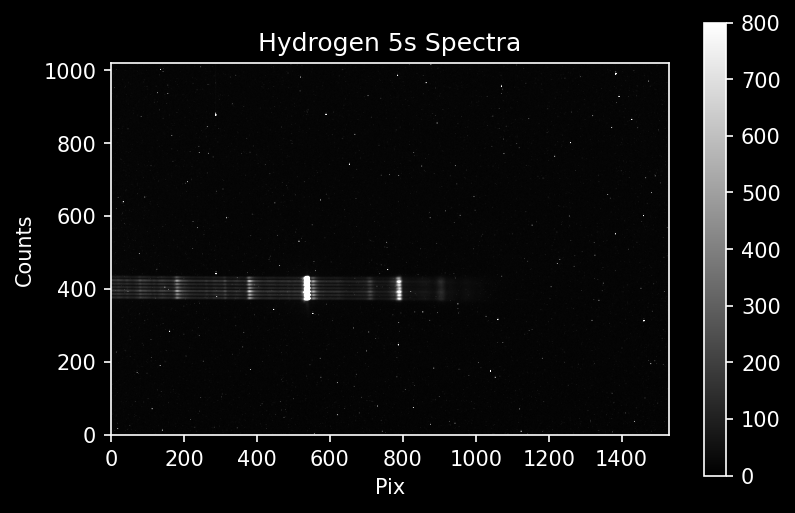

In [4]:
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 150
pl.matplotlib.style.use('dark_background') # Optional!
pl.imshow(h5s_image_data, cmap='gray', vmax=0, vmin=800)
pl.colorbar()
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Hydrogen 5s Spectra')

Text(0.5, 1.0, 'Hydrogen 5s Slope 1')

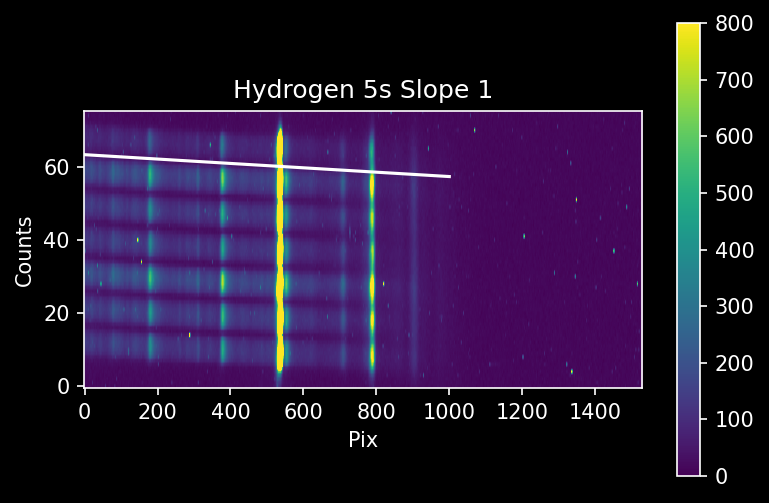

In [5]:
# I drew a line between the top two spectra
dy = -6
dx = 1000
slope = dy/dx
ystart = 365
yend = 441

image_array = np.array(h5s_image_data)
image_array = image_array - np.median(h5s_image_data)
pl.imshow(h5s_image_data[ystart:yend,:], vmax=0, vmin=800)
pl.colorbar()
pl.plot([0,1000], 63.5 + np.array([0,1000]) * slope, color='w')
pl.gca().set_aspect(10)
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Hydrogen 5s Slope 1')

Text(0.5, 1.0, 'Hydrogen 5s Slope 2')

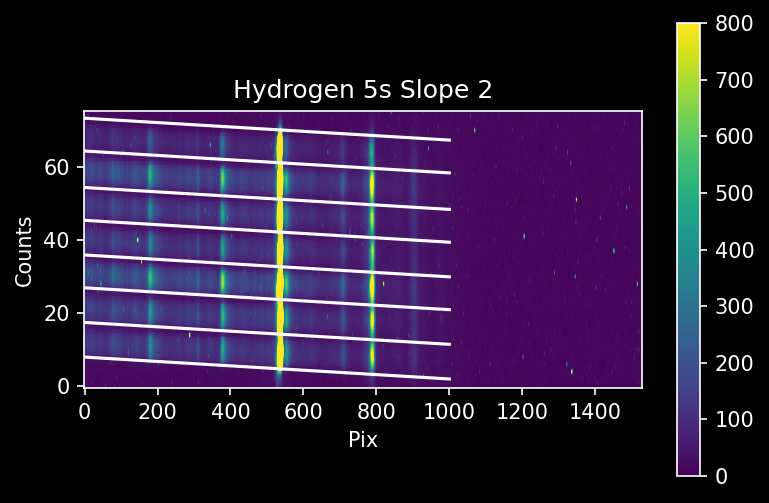

In [6]:
intertrace_cuts = np.array([ 8, 17.5, 27, 36, 45.5, 54.5, 64.5, 73.5])
image_array = np.array(h5s_image_data,)
image_array = image_array - np.median(h5s_image_data,)
pl.imshow(h5s_image_data[ystart:yend,:], vmax=0, vmin=800)
pl.colorbar()
pl.plot([0,1000], intertrace_cuts + np.array([0,1000])[:,None] * slope, color='w')
pl.gca().set_aspect(10)
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Hydrogen 5s Slope 2')

In [7]:
npixels_to_cut = 4 # very conservative - we'll see why below
xvals = np.arange(image_array.shape[1])
trace_center = ystart+(intertrace_cuts[0] + intertrace_cuts[1])/2 + xvals * slope
cutout_trace = np.array([image_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                    for yval, ii in zip(trace_center, xvals)]).T
cutout_trace.shape

(8, 1530)

Text(0.5, 1.0, 'Hydrogen 5s Cutout 1')

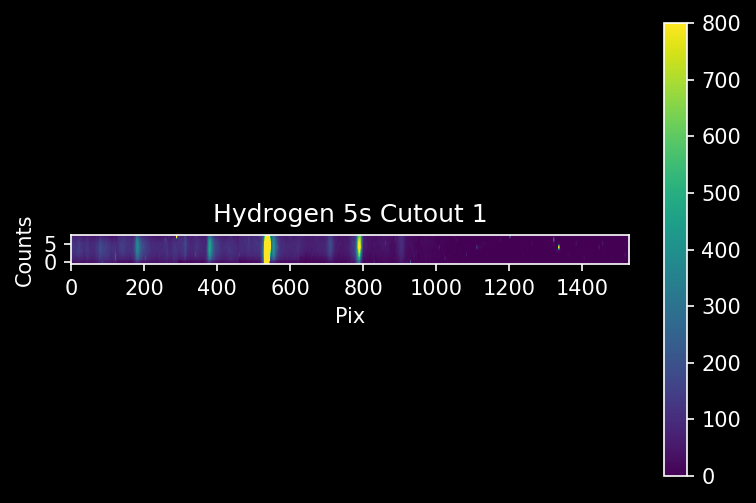

In [8]:
pl.imshow(cutout_trace, vmax=0, vmin=800)
pl.colorbar()
pl.gca().set_aspect(10);
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Hydrogen 5s Cutout 1')

Text(113.83333333333333, 0.5, 'Counts')

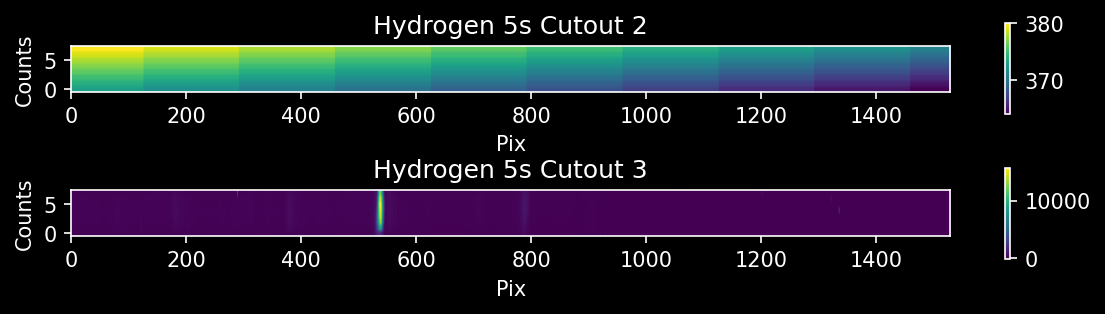

In [9]:
# to get the y-axis values corresponding to each part of our cutout trace, we do the same operation we did on the image
yaxis_full = np.arange(image_array.shape[0])
yaxis = np.array([yaxis_full[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut]
                    for yval, ii in zip(trace_center, xvals)]).T

pl.figure(figsize=(8,2))
im = pl.subplot(2,1,1).imshow(yaxis)
pl.colorbar(mappable=im)
pl.gca().set_aspect(10);
pl.title('Hydrogen 5s Cutout 2')
pl.xlabel('Pix')
pl.ylabel('Counts')
im = pl.subplot(2,1,2).imshow(cutout_trace)
pl.colorbar(mappable=im)
pl.gca().set_aspect(10);
pl.tight_layout()
pl.title('Hydrogen 5s Cutout 3')
pl.xlabel('Pix')
pl.ylabel('Counts')

Text(0, 0.5, 'Counts')

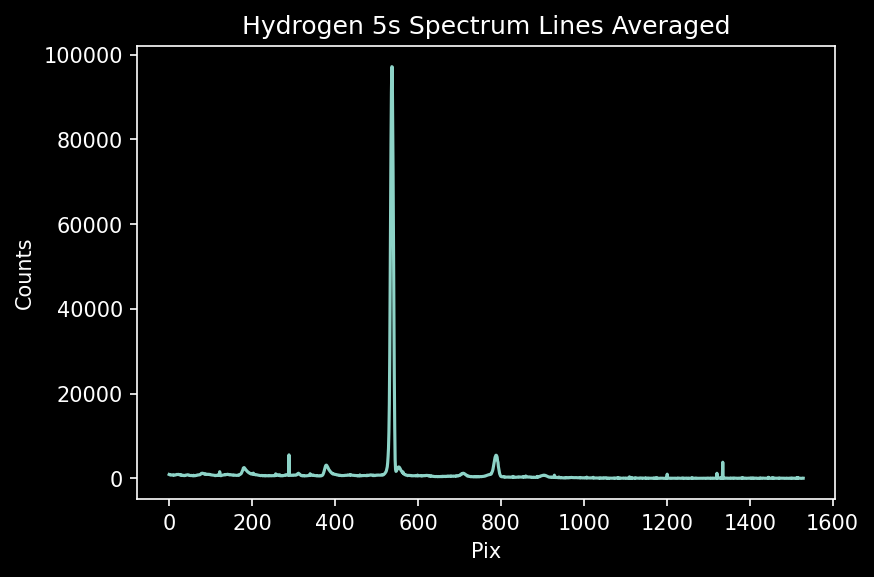

In [10]:
pl.plot(cutout_trace.sum(axis=0))
pl.title('Hydrogen 5s Spectrum Lines Averaged')
pl.xlabel('Pix')
pl.ylabel('Counts')

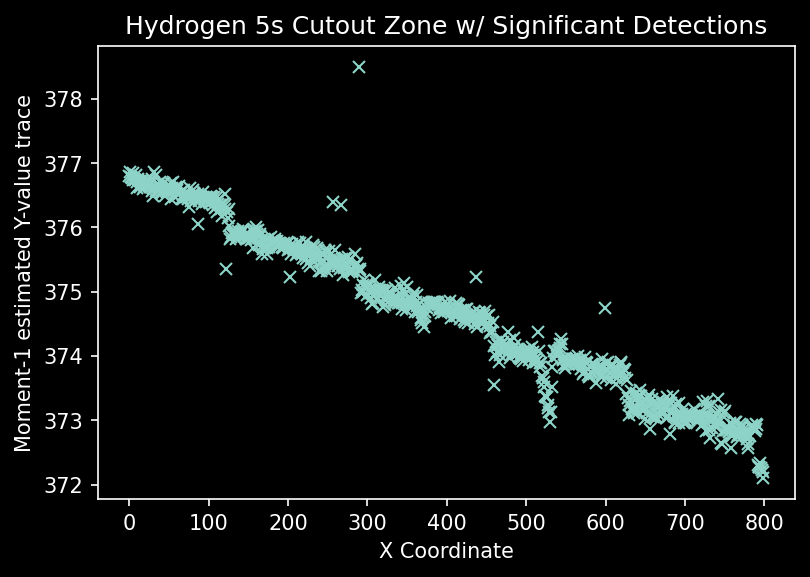

In [11]:
# moment 1 is the data-weighted average of the Y-axis coordinates
xend = 800
weighted_yaxis_values = np.average(yaxis[:,:xend], axis=0,
                                   weights=cutout_trace[:,:xend])

_=pl.plot(xvals[:xend], weighted_yaxis_values, 'x')
_=pl.xlabel("X Coordinate")
_=pl.ylabel("Moment-1 estimated Y-value trace")
_=pl.title("Hydrogen 5s Cutout Zone w/ Significant Detections")

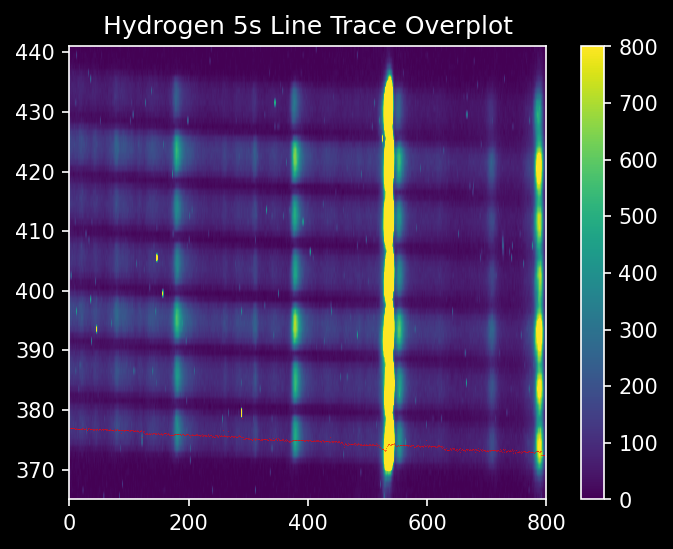

In [12]:
# we need to use the 'extent' keyword to have the axes correctly labeled
_=pl.imshow(image_array[ystart:yend, :xend],
            extent=[0,xend,ystart,yend], vmax=0, vmin=800)
_=pl.colorbar()
_=pl.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
_=pl.plot(xvals[:xend], weighted_yaxis_values[:xend], 'r,', alpha=0.5)
_=pl.axis((0,xend,ystart,yend))
_=pl.title("Hydrogen 5s Line Trace Overplot")

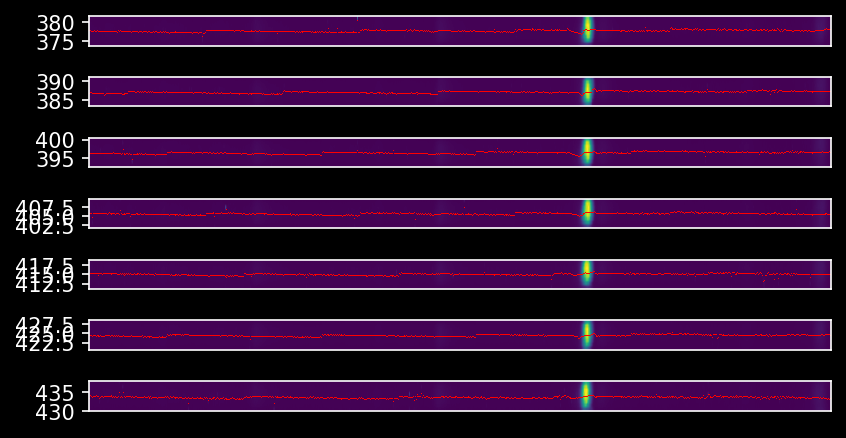

In [13]:
## repeated for each figure
pl.figure(figsize=(8,3))
traces = {}
for trace_index in range(len(intertrace_cuts)-1):
    yoffset = ystart + (intertrace_cuts[trace_index] + intertrace_cuts[trace_index+1])/2
    trace_center = yoffset + slope * xvals

    cutout_trace = np.array([image_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                        for yval, ii in zip(trace_center, xvals)]).T
    yaxis = np.array([yaxis_full[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut]
                     for yval, ii in zip(trace_center, xvals)]).T
    weighted_yaxis_values = np.average(yaxis[:,:xend], axis=0,
                                   weights=cutout_trace[:,:xend])
    
    # it takes a little mental gymnastics to get to this, but: to show the trace properly on our cutout,
    # we need to calculate the local version
    local_weighted_yaxis_values = np.average(np.arange(npixels_to_cut*2)[:,None] * np.ones(xend)[None,:],
                                             axis=0, weights=cutout_trace[:,:xend])
    
    traces[trace_index] = weighted_yaxis_values
    ax = pl.subplot(7, 1, trace_index+1)
    ax.imshow(cutout_trace[:,:xend], extent=[0, xend, yoffset-npixels_to_cut, yoffset + npixels_to_cut])
    ax.plot(xvals[:xend], yoffset - npixels_to_cut + local_weighted_yaxis_values[:xend], 'r,')
    ax.set_aspect(4)
    ax.set_xticks([])
pl.tight_layout()

(0.0, 800.0, 365.0, 441.0)

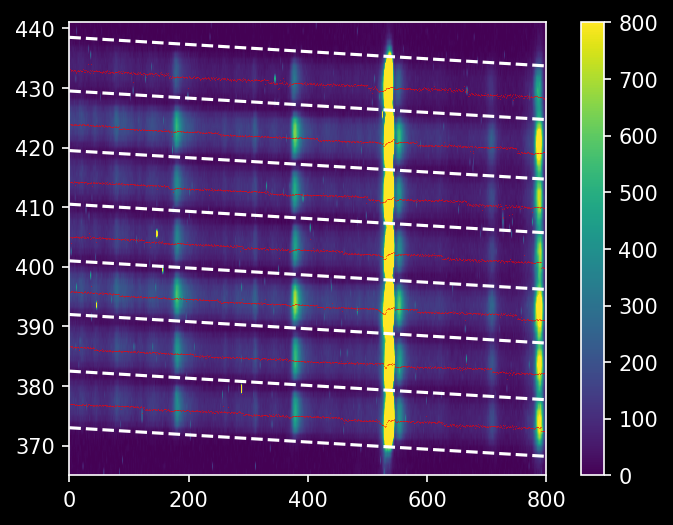

In [14]:
# then we can plot the "global" version here
pl.imshow(image_array[ystart:yend, :xend],
          extent=[0,xend,ystart,yend], vmax=0, vmin=800)
pl.colorbar()
pl.plot([0,xend], ystart + intertrace_cuts + np.array([0,xend])[:,None] * slope, color='w', linestyle='--')
pl.gca().set_aspect(10)
for trace in traces.values():
    pl.plot(xvals[:xend], trace[:xend], 'r,', alpha=0.5)
pl.axis((0,xend,ystart,yend))

In [15]:
# We fit a 2rd-order polynomial
polymodel = Polynomial1D(degree=2)
linfitter = LinearLSQFitter()
fitted_polymodels = {index: linfitter(polymodel, xvals[:xend], weighted_yaxis_values[:xend])
                     for index, weighted_yaxis_values in traces.items()}

In [16]:
fitted_polymodels

{0: <Polynomial1D(2, c0=376.84472181, c1=-0.00572171, c2=0.00000055)>,
 1: <Polynomial1D(2, c0=386.2248404, c1=-0.00558264, c2=0.00000027)>,
 2: <Polynomial1D(2, c0=395.57843298, c1=-0.00580143, c2=0.00000046)>,
 3: <Polynomial1D(2, c0=404.89009397, c1=-0.00594256, c2=0.00000045)>,
 4: <Polynomial1D(2, c0=414.13703429, c1=-0.00548093, c2=-0.00000012)>,
 5: <Polynomial1D(2, c0=423.65390192, c1=-0.0059824, c2=0.00000053)>,
 6: <Polynomial1D(2, c0=432.86047535, c1=-0.00565598, c2=-0.00000008)>}

(0.0, 800.0, 365.0, 441.0)

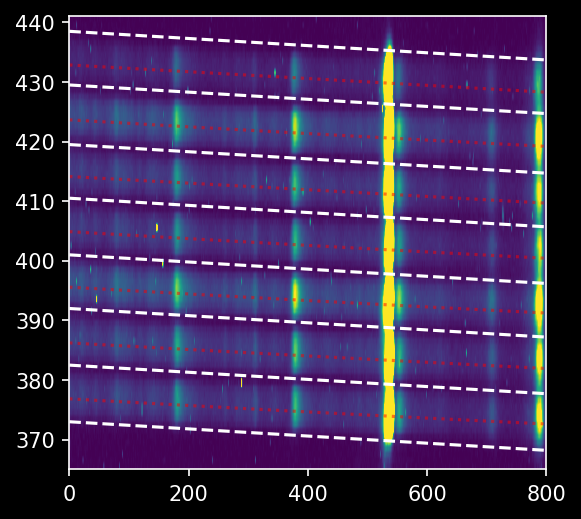

In [17]:
pl.imshow(image_array[ystart:yend, :xend],
          extent=[0,xend,ystart,yend],
          vmin=0, vmax=700,
         )
pl.plot([0,xend], ystart + intertrace_cuts + np.array([0,xend])[:,None] * slope, color='w', linestyle='--')
pl.gca().set_aspect(10)
for tracefit in fitted_polymodels.values():
    pl.plot(xvals[:xend], tracefit(xvals[:xend]), 'r:', alpha=0.5)
pl.axis((0,xend,ystart,yend))

In [18]:
lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=160, mean=0, stddev=5)

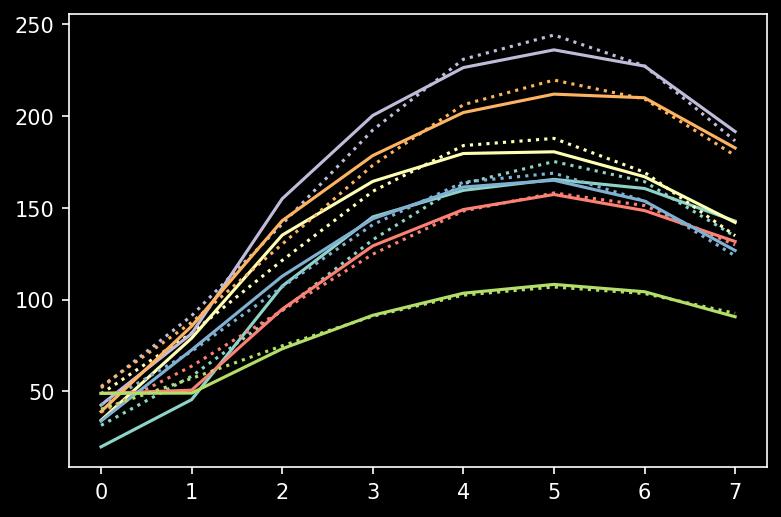

In [19]:
npixels_to_cut_trace = 4

for trace_index, polymodel_trace in fitted_polymodels.items():
    trace_center = polymodel_trace(xvals)

    cutout_trace = np.array([image_array[int(yval)-npixels_to_cut_trace:int(yval)+npixels_to_cut_trace, ii]
                        for yval, ii in zip(trace_center, xvals)]).T

    trace_profile = cutout_trace.mean(axis=1)
    trace_profile_xaxis = np.arange(len(trace_profile))
    fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=trace_profile)
    model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
    
    line, = pl.plot(trace_profile, label=trace_index)
    pl.plot(trace_profile_xaxis, model_trace_profile, color=line.get_color(), linestyle=':')

In [20]:
spectra = {}
for trace_index, polymodel_trace in fitted_polymodels.items():
    trace_center = polymodel_trace(xvals)

    cutout_trace = np.array([image_array[int(yval)-npixels_to_cut_trace:int(yval)+npixels_to_cut_trace, ii]
                        for yval, ii in zip(trace_center, xvals)]).T

    trace_profile = cutout_trace.mean(axis=1)
    trace_profile_xaxis = np.arange(len(trace_profile))
    fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=trace_profile)
    model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
    
    trace_avg_spectrum = np.array([np.average(
            image_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
            weights=trace_profile)
                               for yval, ii in zip(trace_center, xvals)])
    spectra[trace_index] = trace_avg_spectrum

(0.0, 800.0)

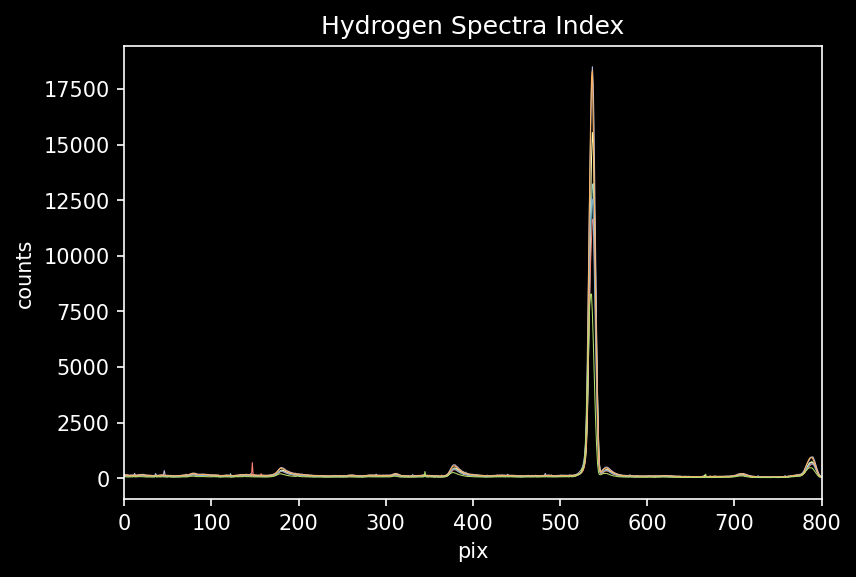

In [22]:
for index in spectra:
    pl.plot(spectra[index], linewidth=0.5)
    pl.xlabel('pix')
    pl.ylabel('counts')
    pl.title('Hydrogen Spectra Index')
pl.xlim(0,800)